## Desafio - Análise de Dados com Python
#### Desenvolvedor: Lucca de Sena Barbosa
#### Curso: Ciências da Computação - 3º período
#### Ferramenta de desenvolvimento: PyCharm

🔹 Faça a análise de um dataset de um rh de uma empresa, plote gráficos e escreva em cada etapa o que você entendeu do código e extraia insights


In [68]:
# Importação das Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importando um dataset de origem ".csv" através do método pandas

df = pd.read_csv("data/dados_rh.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## 1. Tratamento dos Dados:
Antes de iniciar a análise, é fundamental garantir que os dados estejam limpos e representem corretamente a realidade do banco de dados. Qualquer inconsistência pode comprometer os insights obtidos.
Neste passo, realizaremos uma análise detalhada de cada coluna para identificar e corrigir possíveis problemas

In [48]:
df.columns      # Retorna o nome das colunas

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [49]:
df.info()       # Traz informações gerais sobre a base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Como apresentado, não há indícios de valores nulos nas colunas dos dados.

In [50]:
# Nesta parte do código, será reunido todos os valores que compõe as colunas do tipo objeto

group_attrition = df.groupby('Attrition').size()
group_BusinessTravel = df.groupby('BusinessTravel').size()
group_Department= df.groupby('Department').size()
group_EducationField= df.groupby('EducationField').size()
group_Gender = df.groupby('Gender').size()
group_JobRole= df.groupby('JobRole').size()
group_MaritalStatus= df.groupby('MaritalStatus').size()
group_Over18 = df.groupby('Over18').size()
group_OverTime= df.groupby('OverTime').size()

In [51]:
group_attrition

Attrition
No     1233
Yes     237
dtype: int64

In [52]:
group_BusinessTravel

BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
dtype: int64

In [53]:
group_Department

Department
Human Resources            63
Research & Development    961
Sales                     446
dtype: int64

In [54]:
group_EducationField

EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
dtype: int64

In [55]:
group_Gender

Gender
Female    588
Male      882
dtype: int64

In [56]:
group_JobRole

JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
dtype: int64

In [57]:
group_MaritalStatus

MaritalStatus
Divorced    327
Married     673
Single      470
dtype: int64

In [58]:
group_Over18

Over18
Y    1470
dtype: int64

In [59]:
group_OverTime

OverTime
No     1054
Yes     416
dtype: int64

Ao observar essa sequência de colunas do tipo objeto, nota-se que os dados então em conformidade e não apresentam qualquer tipo de erro na digitação.

## 2. Análise de Dados:
- Nesta etapa, iremos gerar gráficos e extrair insights dos dados.

### A. Relação "Gender" com "MonthlyIncome"

In [182]:
gender_income = df.groupby('Gender')['MonthlyIncome'].mean()
gender_income


Gender
Female    6686.566327
Male      6380.507937
Name: MonthlyIncome, dtype: float64

In [184]:
gender_income = df.groupby('Gender')['MonthlyIncome'].size()
gender_income

Gender
Female    588
Male      882
Name: MonthlyIncome, dtype: int64

In [190]:
porcent_female = gender_income.iloc[0] / (gender_income.iloc[0] + gender_income.iloc[1])
porcent_male = gender_income.iloc[1] / (gender_income.iloc[0] + gender_income.iloc[1])

print(f"As mulheres representam: {porcent_female*100:.2f}%")
print(f"Os homens representam: {porcent_male*100:.2f}%")

As mulheres representam: 40.00%
Os homens representam: 60.00%


- Após observar essas duas informações, sabemos que a média salarial das mulheres é inferior se comparada ao dos homens. No entanto, é importante destacar que a possível causa dessa diferença salarial esteja na quantidade de homens e mulheres na base de dados, pois enquanto os homens representam 60% da base de dados, as mulheres representam 40%.

### B. Proporção da área acadêmica

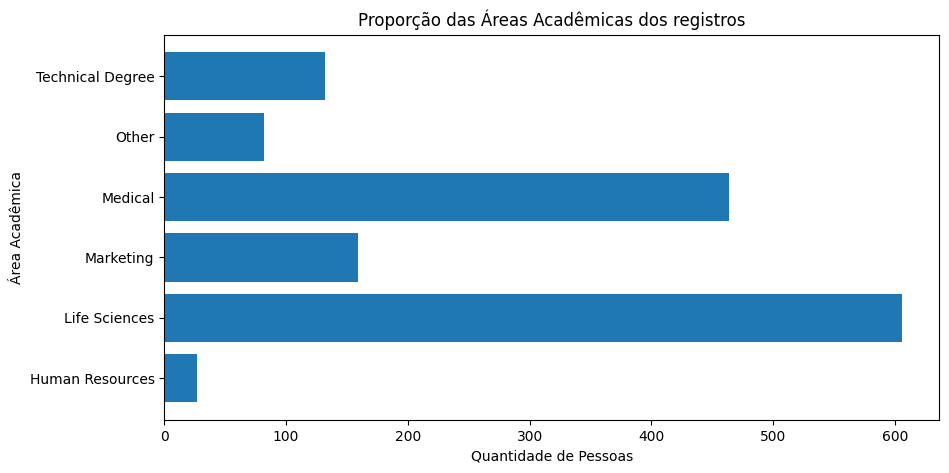

In [274]:
education = df.groupby('EducationField').size()     # Agrupa a quantidade de cada campo de educação

plt.figure(figsize=(10, 5))                         # Configura o tamanho do gráfico

plt.barh(education.index, education)                # Monta o gráfico de barra horizontal que mostra o agrupamento feito pela variável anterior.

plt.xlabel('Quantidade de Pessoas')
plt.ylabel('Área Acadêmica')
plt.title('Proporção das Áreas Acadêmicas dos registros')
plt.show()

- Nota-se que a área acadêmica de maior relevância em termos quantitativos da base é a "Life Sciences", o que se difere da "Human Resources" que possui uma menor quantidade.

### C. Quantidade de funcionários que permaneceram por mais tempo na empresa

Text(0, 0.5, 'Quantidade de Pessoas')

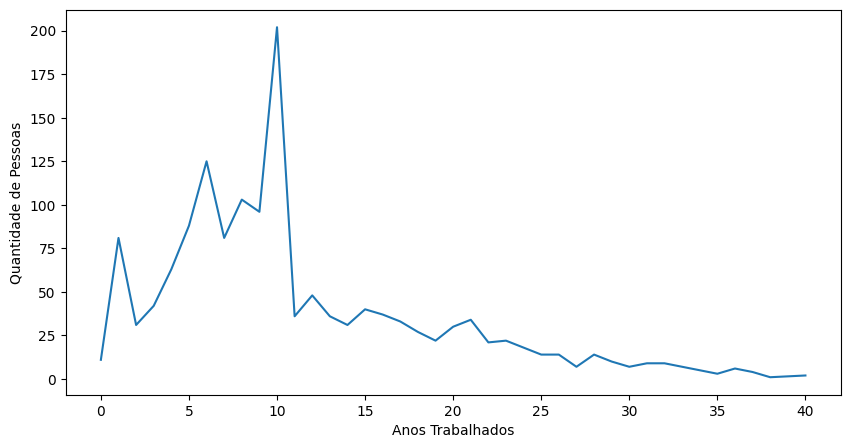

In [273]:
age_work = df.groupby('TotalWorkingYears').size()
plt.figure(figsize=(10, 5))
plt.plot(age_work)
plt.xlabel('Anos Trabalhados')
plt.ylabel('Quantidade de Pessoas')


- Nota-se que a maioria dos funcionário conseguem permanecer na empresa um pouco mais de 10 anos de trabalho, após isso o número de demissões começam a crescer e a tendência é menos pessoas permaneceram na empresa.

### D. Satisfação no trabalho por cargo

<Axes: ylabel='JobSatisfaction'>

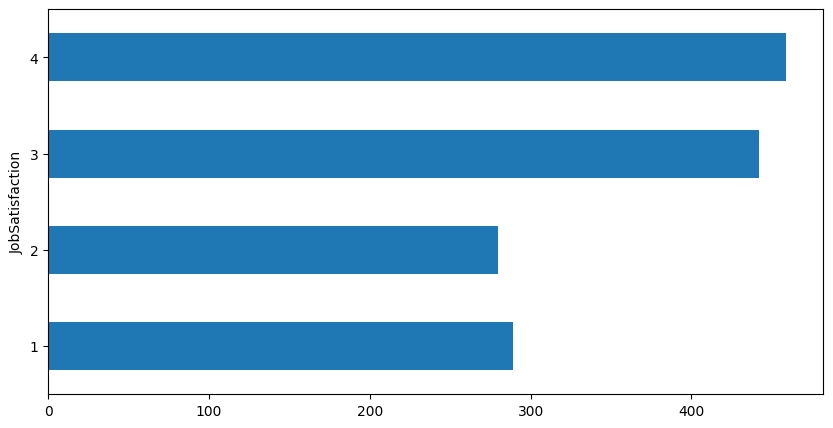

In [272]:
role_satisfaction = df.groupby('JobSatisfaction')['JobRole'].size()

plt.figure(figsize=(10, 5))

role_satisfaction.plot(kind='barh')

In [239]:
role_satisfaction

JobSatisfaction
1    289
2    280
3    442
4    459
Name: JobRole, dtype: int64

- Nota-se que uma quantidade significativa das pessoas dessa empresa ficaram satisfeitas com o seu cargo, levando em consideração que o índicativo está no rótulo 3 e 4.

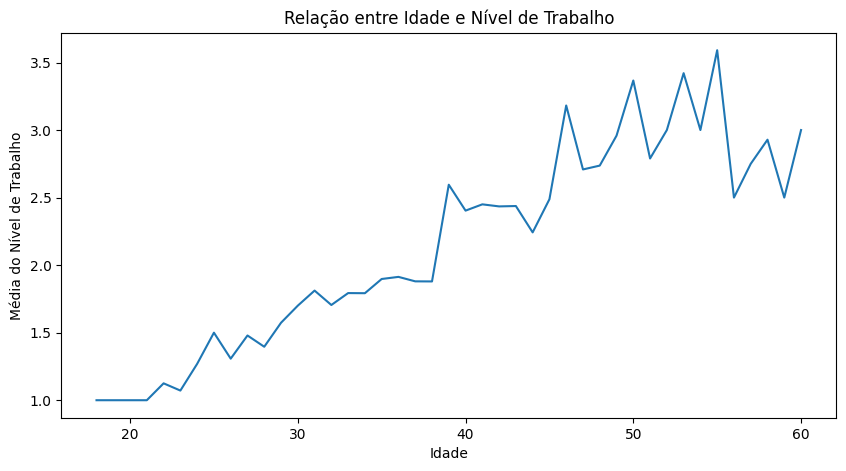

In [271]:
import matplotlib.pyplot as plt

job_age = df.groupby('Age')['JobLevel'].mean()

plt.figure(figsize=(10, 5))
plt.plot(job_age.index, job_age.values)

plt.xlabel('Idade')
plt.ylabel('Média do Nível de Trabalho')
plt.title('Relação entre Idade e Nível de Trabalho')
plt.show()


Notas-se que conforme a pessoa tenha uma idade mais avançada, maior será seu nível de trabalho.

### Resumo

Em resumo, pode-se concluir que nesta base de dados:
- Existem mais homens (882) do que mulheres (588).
- Existe uma pequena diferença da média salarial entre homens e mulheres.
- A uma tendência que após 10 anos de trabalhos, o número de empregados começam a diminuir.
- Em geral, os empregados estão satisfeitos com o próprio cargo de trabalho dando notas de 3 ou 4 (nota máxima).
- No coletivo, há mais pessoas na área de Life Sciences e muito menos na área de Human Resources.
- Existe uma tendência de que conforme a pessoa tenha uma idade avançada, maior será nível de trabalho.